## Урок 2. Масштабирование признаков. L1 и L2 регуляризация. Стохастический градиентный спуск. 

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [12]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)

In [13]:
W_default

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

In [14]:
y_pred_default = X @ W_default

In [15]:
# Посчитаем MSE
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [16]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340427

In [17]:
def my_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [18]:
W_1, mse_1, score_1 = my_grad_desc(X, y, alpha=0.001, tol=0.00001)

Stop descent! iteration: 6807, weights: [17.01840938 54.47027145  4.75415743 63.30988856 93.39791918 71.04148579
 86.9856912  10.23639497  3.51108992 70.81239031], mse: 14.301241439157128


In [19]:
def my_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [20]:
W_2, mse_2, score_2 = my_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Stop descent! n_epoch: 5511, weights: [17.03648751 54.52220489  4.68283841 63.30941965 93.3281835  71.13061547
 86.88956996 10.12962938  3.54036507 70.69078056], mse: 10.996374680976254


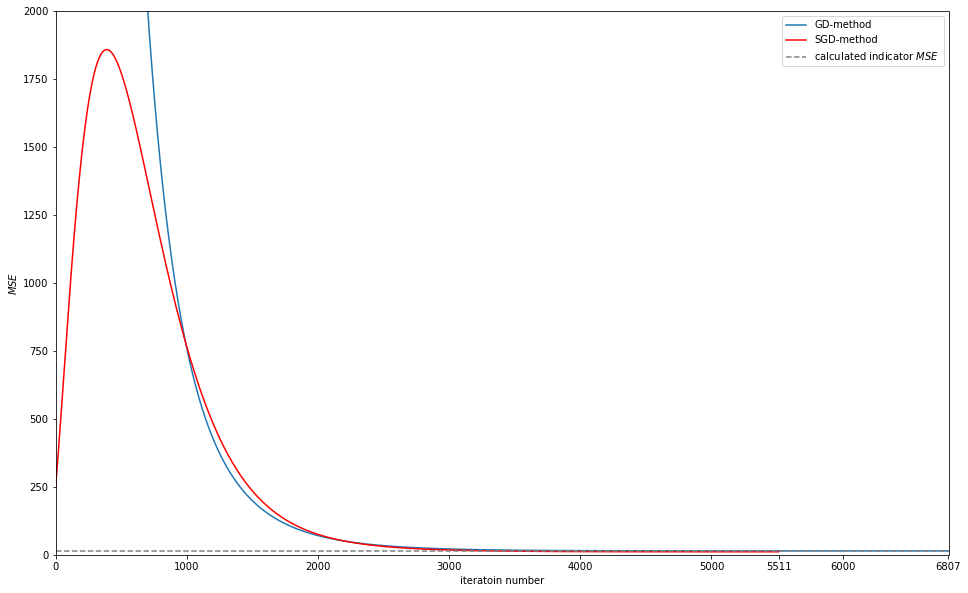

In [21]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

На основании графиков можно сделать вывод что примерно до 800-й итерации SVG  'расходился'(значение MSE росло), затем, до уроня 2300-2400 итераций оба алгоритма сходились, при этом скорость схождения GB была выше, чем у SVG . Однако затем скорости уравнялись, и SVG сошелся раньше чем GB (5538 итераций против 6746).



2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [23]:
# L2 норма вектора
def euclid(vec):
    norm=0
    for i in vec:
        norm+=i**2
    return norm**0.5

Подкорректируем функции GB и SVG:

In [24]:
def my_grad_desc_reg(X, y, alpha=1e-04, verbose=False, tol=0.0, lambda_=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)+lambda_*euclid(W) # добавляем в расчет ошибки фактор L2 регуляризации
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))+lambda_*W # добавим коэфф. лямбда для расчёта весов
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [25]:
W_3, mse_3, score_3 = my_grad_desc_reg(X, y, alpha=0.001, tol=0.00001, lambda_=0.0000001)

Stop descent! iteration: 6788, weights: [17.01855865 54.46681952  4.75447984 63.30672423 93.39287023 71.03861222
 86.98264324 10.23476298  3.51158314 70.80889499], mse: 14.301655981516593


In [26]:
def my_sgd_reg(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0, lambda_=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)+lambda_*euclid(W) # добавляем в расчет ошибки фактор L2 регуляризации
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)+lambda_*W
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [27]:
W_4, mse_4, score_4 = my_sgd_reg(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001, lambda_=0.0000001)

Stop descent! n_epoch: 5511, weights: [17.0348638  54.27357791  4.6085284  63.01606332 92.74536485 70.95611912
 86.44478743  9.82257028  3.61420455 70.21071322], mse: 14.563514911057519


In [28]:
df=pd.DataFrame(
    {
        'methods':['GD', 'SGD','GD + L2','SGD + L2'],
        r'$\lambda$-coeff':[None,None,0.001,0.001],
        'tol-value': 0.00001,
        'iterations': [len(it) for it in [score_1, score_2, score_3,score_4]],
        'err-value': [it[-1] for it in [score_1, score_2, score_3,score_4]]
    }
)
df

,methods,$\lambda$-coeff,tol-value,iterations,err-value
0,GD,NaN,0.00001,6807,14.301231
1,SGD,NaN,0.00001,5511,10.996365
2,GD + L2,0.001,0.00001,6788,14.301646
3,SGD + L2,0.001,0.00001,5511,14.563505


In [29]:
df2=pd.DataFrame({'GD':W_1, 'SGD':W_2,'GD + L2':W_3,'SGD + L2':W_4}, index=['weigt'+str(i) for i in range(10)])
df2

,GD,SGD,GD + L2,SGD + L2
weigt0,17.018404,17.036488,17.018553,17.034864
weigt1,54.470248,54.522205,54.466797,54.273578
weigt2,4.754188,4.682838,4.754509,4.608528
weigt3,63.309888,63.309420,63.306724,63.016063
weigt4,93.397947,93.328184,93.392898,92.745365
weigt5,71.041448,71.130615,71.038576,70.956119
weigt6,86.985732,86.889570,86.982683,86.444787
weigt7,10.236439,10.129629,10.234806,9.822570
weigt8,3.511078,3.540365,3.511572,3.614205
weigt9,70.812440,70.690781,70.808944,70.210713


Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [30]:
# L1 норма вектора
def manhattan(vec):
    norm=0
    for i in vec:
        norm+=i if i>0 else -i
    return norm    

In [31]:
def grad_desc_reg(X, y, alpha=1e-04, verbose=False, tol=0.0, lambda_=0.0, regularization=None):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    if regularization=='L1': # учитываем тип регуляризации L1
        reg_elem=manhattan
    elif regularization=='L2': # учитываем тип регуляризации L2
        reg_elem=euclid
    else:
        reg_elem=lambda x: 0 # учитываем отсутствие регуляризации
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)+lambda_*reg_elem(W) # добавляем в расчет ошибки выбранный фактор регуляризации
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))+lambda_*W
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [32]:
W_5, mse_5, score_5 = grad_desc_reg(X, y, alpha=0.001, tol=0.00001, lambda_=0.00001, regularization='L1')

Stop descent! iteration: 8610, weights: [17.01345252 54.20397569  4.70221051 63.01573632 92.83507554 70.83985048
 86.57075164  9.96140995  3.57681473 70.36791679], mse: 15.185899736863377


In [33]:
def sgd_reg(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0, lambda_=0.0, regularization=None):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    if regularization=='L1': # учитываем тип регуляризации
        reg_elem=manhattan
    elif regularization=='L2':
        reg_elem=euclid
    else:
        reg_elem=lambda x: 0
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)+lambda_*reg_elem(W)  # добавляем в расчет ошибки выбранный фактор регуляризации
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)+lambda_*W
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            min_err=err
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
            break
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [34]:
W_6, mse_6, score_6 = sgd_reg(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001, lambda_=0.0000001, regularization='L1')

Stop descent! n_epoch: 5550, weights: [17.03380917 54.26879458  4.6152433  63.01586912 92.75148826 70.94826435
 86.45347569  9.83218401  3.6118044  70.22115117], mse: 14.570058383615798


In [35]:
df=df.append(
    pd.DataFrame(
        {
            'methods':['GD + L1','SGD + L1'],
            r'$\lambda$-coeff':[0.001,0.001],
            'tol-value': 0.00001,
            'iterations': [len(it) for it in [score_5, score_6]],
            'err-value': [it[-1] for it in [score_5, score_6]]
        }
    ), ignore_index=True
)
df

,methods,$\lambda$-coeff,tol-value,iterations,err-value
0,GD,NaN,0.00001,6807,14.301231
1,SGD,NaN,0.00001,5511,10.996365
2,GD + L2,0.001,0.00001,6788,14.301646
3,SGD + L2,0.001,0.00001,5511,14.563505
4,GD + L1,0.001,0.00001,8610,15.185890
5,SGD + L1,0.001,0.00001,5550,14.570049
